In [72]:
! git clone https://github.com/Nelson-Gon/cytounet.git

Cloning into 'cytounet'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 832 (delta 60), reused 68 (delta 26), pack-reused 726
Receiving objects: 100% (832/832), 49.87 MiB | 37.03 MiB/s, done.
Resolving deltas: 100% (334/334), done.


In [73]:
%cd cytounet

/kaggle/working/cytounet/cytounet/cytounet/cytounet/cytounet/cytounet/cytounet


In [74]:
from cytounet.model import *
from cytounet.augmentation import *
from cytounet.data import *

In [75]:
data_gen_args = dict(rotation_range=0.1,
                      rescale = 1./255,
                    width_shift_range=0.1,
                    height_shift_range=0.1,
                    shear_range=0.1,
                    zoom_range=0.1,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [76]:
# augmentation will take up a lot of space, only use if you have enough space on disk
#! if [ ! -d "aug" ]; then mkdir aug aug/images aug/masks;fi

In [77]:
my_generator = generate_train_data(20,'examples/legacy/data/train','image','label',data_gen_args,save_to_dir = None, seed= 25,
                              target_size = (256, 256))

In [78]:
# save space on device
#! rm -rf aug

In [79]:
model = unet(input_size = (256, 256, 1),optimiser='Adam', metrics=['accuracy'], loss='binary_crossentropy', 
             learning_rate=3e-4) 

In [80]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [81]:
history = model.fit_generator(my_generator,steps_per_epoch= 1000,epochs=10, 
                              callbacks = [EarlyStopping(verbose=1, monitor='loss', patience = 2),
                                          ReduceLROnPlateau(verbose=1, monitor='loss', patience =2)])

Epoch 1/10
Found 30 images belonging to 1 classes.
Found 30 images belonging to 1 classes.
1000/1000 [==============================] - 812s 812ms/step - loss: 0.8131 - accuracy: 0.6856
Epoch 2/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.3378 - accuracy: 0.7557
Epoch 3/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.2816 - accuracy: 0.7820
Epoch 4/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.2636 - accuracy: 0.7881
Epoch 5/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.2269 - accuracy: 0.8021
Epoch 6/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.2030 - accuracy: 0.8138
Epoch 7/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.2360 - accuracy: 0.8006
Epoch 8/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.2430 - accuracy: 0.7951

Epoch 00008: ReduceLROnPlateau reducing learning rate to 3.000000142492

In [82]:
model.save("unet_segment.hdf5")

In [83]:
test_generator = generate_test_data("examples/legacy/data/test", 30, image_suffix="png")

In [84]:
model = unet(pretrained_weights="unet_segment.hdf5")
results = model.predict_generator(test_generator,30,verbose=1)

30/30 [==============================] - 2s 54ms/step


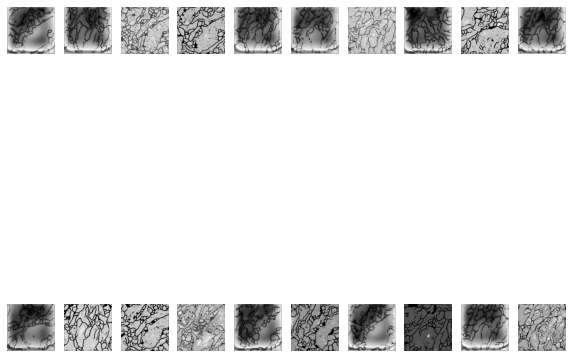

In [85]:
show_images(results, number = 10 )